# Analysis Demographic Churning of Telco-customer

Project objective and aim
- To identify the rate at which is each demographic churn
- To identify the overall unique demographic 
- Create a visual representation of the result using Matplotlib

## Information on Dataset

Using Telco Customer churn data obtain from Kaggle: https://www.kaggle.com/datasets/blastchar/telco-customer-churn?resource=download.
> The data was downloaded onto a local machine on the  27/01/2025

Features of the dataset 
- Customer ID: Unique code to each customer
- Gender: Whether the customer is a male or a female
- Senior Citizen: Whether the customer is a senior citizen or not (1, 0)
- Partner: Whether the customer has a partner or not (Yes, No)
- Dependents: Whether the customer has dependents or not (Yes, No)
- Tenure: Number of months the customer has stayed with the company
- PoneService: Whether the customer has a phone service or not (Yes, No)
- MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract: The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card
- MonthlyCharges: The amount charged to the customer monthly
- TotalCharges: The total amount charged to the customer
- Churn: Whether the customer churned or not (Yes or No)

Features of interest:  
- Gender: Whether the customer is a male or a female
- Senior Citizen: Whether the customer is a senior citizen or not (1, 0)
- Partner: Whether the customer has a partner or not (Yes, No)
- Dependents: Whether the customer has dependents or not (Yes, No)
- Churn: Whether the customer churned or not (Yes or No)

## Loading dataset

Import the required libraries.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Loading the data

In [3]:
df = pd.read_csv('Telco-Customer-Churn-Data.csv')

## Data Exploring the data set

Displaying the top 5 rows and columns of the dataset to get a feel of how the dataset look.

In [4]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [5]:
# Exploring the numbers of rows and columns of data in the dataset.
df.shape

(7043, 21)

### Getting more information on the data

Exploring the dataset and identify the data types of each column.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Note:
* The data set have 7043 observation and 21 variable.
* There is no missing data
* TotalCharges is an object datatype, from observation, this should be numerical data type (float or int) 

In [7]:
# changing the data type of TotalCharges from object to float and printing data types of all the columns to confirm change.
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')
df["TotalCharges"] = df["TotalCharges"].astype("float")

# print the list of column and their data type to confimed that totalcharges has been changed to a numerical datatype.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Data Wrangling

### Searching duplicates Values

In [8]:
df.duplicated().value_counts()

False    7043
Name: count, dtype: int64

No duplicate find

### Searching Missing Values

In [9]:
missing_data = df.isnull().sum()
missing_data

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Based on the above result, it can be observed that TotalCharges, have 11 missing data.
> This has no baring on feature of interesting, and in this instance it will be largely ignore. But explored to find the reason of the missing data.

#### Finding line with the missing values

In [10]:
null_mask = df.isnull().any(axis=1)
null_rows = df[null_mask]

null_rows

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


From the observation of the table above, the conclusion is the missing data are for new customer at the beginning of their contract, as a result have zero tenure, and consequently have no total charge record.

## Analysis of the Demographic of the Dataset

### Selecting feature of Interest

In [11]:
Demographic_data = df[['gender', 'SeniorCitizen' , 'Partner','Dependents', 'Churn']]
Demographic_data.head()

,gender,SeniorCitizen,Partner,Dependents,Churn
0,Female,0,Yes,No,No
1,Male,0,No,No,No
2,Male,0,No,No,Yes
3,Male,0,No,No,No
4,Female,0,No,No,Yes


In [12]:
# Getting statistical information on the object data types (non numerical columns)
Demographic_data.describe(include = 'object')

,gender,Partner,Dependents,Churn
count,7043,7043,7043,7043
unique,2,2,2,2
top,Male,No,No,No
freq,3555,3641,4933,5174


#### Analysis the gender column

In [13]:
Demographic_data['gender'].value_counts().reset_index()

,gender,count
0,Male,3555
1,Female,3488


In [14]:
demo_gender = Demographic_data[['gender','Churn']].value_counts().reset_index().sort_values(by=['gender'], ignore_index = True)
demo_gender

,gender,Churn,count
0,Female,No,2549
1,Female,Yes,939
2,Male,No,2625
3,Male,Yes,930


##### Calculating genders churn rate

In [15]:
# Churning rate for Female
round((demo_gender.loc[1,'count'])/(demo_gender.loc[0,'count']+demo_gender.loc[1,'count'])*100, 2)

26.92

In [16]:
# Churning rate for Male
round((demo_gender.loc[3,'count'])/(demo_gender.loc[2,'count']+demo_gender.loc[3,'count'])*100, 2)

26.16

#### Analysis the SeniorCitizen Column

In [17]:
# Relabeling the SeniorCitizen value
category_mapping = { 0 : 'Young', 1 : 'Old'}
Demographic_data.loc[:, 'SeniorCitizen'] = Demographic_data['SeniorCitizen'].map(category_mapping)

In [18]:
Demographic_data['SeniorCitizen'].value_counts().reset_index()

,SeniorCitizen,count
0,Young,5901
1,Old,1142


In [19]:
demo_SeniorCitizen = Demographic_data[['SeniorCitizen','Churn']].value_counts().reset_index().sort_values(by=['SeniorCitizen'], ignore_index = True)
demo_SeniorCitizen

,SeniorCitizen,Churn,count
0,Old,No,666
1,Old,Yes,476
2,Young,No,4508
3,Young,Yes,1393


##### Calculating Senior Citizen Churning rate

In [20]:
# Churning rate for Older Customer
round((demo_SeniorCitizen.loc[1,'count'])/(demo_SeniorCitizen.loc[0,'count']+demo_SeniorCitizen.loc[1,'count'])*100, 2)

41.68

In [21]:
# Churning rate for Younger Customer
round((demo_SeniorCitizen.loc[3,'count'])/(demo_SeniorCitizen.loc[2,'count']+demo_SeniorCitizen.loc[3,'count'])*100, 2)

23.61

#### Analysis the Partner column

In [22]:
# Relabeling the Partner value
category_mapping = { 'No' : 'Single', 'Yes' : 'In Relationship'}
Demographic_data.loc[:, 'Partner'] = Demographic_data['Partner'].map(category_mapping)

In [23]:
Demographic_data['Partner'].value_counts().reset_index()

,Partner,count
0,Single,3641
1,In Relationship,3402


In [24]:
demo_partner = Demographic_data[['Partner','Churn']].value_counts().reset_index().sort_values(by=['Partner'], ignore_index = True)
demo_partner

,Partner,Churn,count
0,In Relationship,No,2733
1,In Relationship,Yes,669
2,Single,No,2441
3,Single,Yes,1200


##### Calculating Partner Churning rate

In [25]:
# churning rate of single customer
round(((demo_partner.loc[3,'count'])/((demo_partner.loc[2,'count'])+(demo_partner.loc[3,'count'])))*100, 2)

32.96

In [26]:
# churning rate of customer in relationship
round(((demo_partner.loc[1,'count'])/((demo_partner.loc[0,'count'])+(demo_partner.loc[1,'count'])))*100, 2)

19.66

#### Analysis the Dependents column

In [27]:
# Relabeling the dependents value
category_mapping = {'No':'Independent','Yes':'Has dependents'}
Demographic_data.loc[:,'Dependents'] = Demographic_data['Dependents'].map(category_mapping)

In [28]:
Demographic_data['Dependents'].value_counts().reset_index()

,Dependents,count
0,Independent,4933
1,Has dependents,2110


In [29]:
demo_dependents = Demographic_data[['Dependents','Churn']].value_counts().reset_index().sort_values(by=['Dependents'], ignore_index = True)
demo_dependents

,Dependents,Churn,count
0,Has dependents,No,1784
1,Has dependents,Yes,326
2,Independent,No,3390
3,Independent,Yes,1543


In [30]:
# Churning rate of customer with dependents
round(((demo_dependents.loc[1,'count'])/(demo_dependents.loc[0,'count'] + demo_dependents.loc[1,'count']))*100,2)

15.45

In [31]:
# Churning rate of customer without dependents
round(((demo_dependents.loc[3,'count'])/(demo_dependents.loc[2,'count'] + demo_dependents.loc[3,'count']))*100,2)

31.28

#### Analysis the demographic as a whole.

In [42]:
Demographic_data.loc[:,'Combined'] = Demographic_data['gender'] + '_' + Demographic_data['SeniorCitizen'] + '_' + Demographic_data['Partner'] + '_' + Demographic_data['Dependents']
Demographic_data.head()

,gender,SeniorCitizen,Partner,Dependents,Churn,Combined
0,Female,Young,In Relationship,Independent,No,Female_Young_In Relationship_Independent
1,Male,Young,Single,Independent,No,Male_Young_Single_Independent
2,Male,Young,Single,Independent,Yes,Male_Young_Single_Independent
3,Male,Young,Single,Independent,No,Male_Young_Single_Independent
4,Female,Young,Single,Independent,Yes,Female_Young_Single_Independent


In [33]:
Demographic_data['Combined'].value_counts().reset_index()

,Combined,count
0,Male_Young_Single_Independent,1381
1,Female_Young_Single_Independent,1338
2,Female_Young_In Relationship_Has dependents,844
3,Male_Young_In Relationship_Has dependents,822
4,Female_Young_In Relationship_Independent,596
5,Male_Young_In Relationship_Independent,567
6,Female_Old_Single_Independent,317
7,Male_Old_In Relationship_Independent,281
8,Male_Old_Single_Independent,244
9,Male_Young_Single_Has dependents,211


In [34]:
demo_unique = Demographic_data[['Combined','Churn']].value_counts().reset_index().sort_values(by=['Combined','Churn'], ignore_index = True)
demo_unique

,Combined,Churn,count
0,Female_Old_In Relationship_Has dependents,No,31
1,Female_Old_In Relationship_Has dependents,Yes,8
2,Female_Old_In Relationship_Independent,No,136
3,Female_Old_In Relationship_Independent,Yes,73
4,Female_Old_Single_Has dependents,No,2
5,Female_Old_Single_Has dependents,Yes,1
6,Female_Old_Single_Independent,No,159
7,Female_Old_Single_Independent,Yes,158
8,Female_Young_In Relationship_Has dependents,No,720
9,Female_Young_In Relationship_Has dependents,Yes,124


In [35]:
# Creating/calculating the churn of the each unique demographic
churn_table = {'Unique_demo' : [], 'Customer Count': [],'Customer Percentage (%)': [],
               'Churn_rate (%)' : [], 'No of Churn Customer': [], 'Percentage relative to total customer lost (%)': []}

# Iterate over rows using .iloc[] (index-based)

for i in range(int((len(demo_unique)/2))):
    churn_table['Unique_demo'].append(demo_unique.loc[(i*2), 'Combined'])
    churn_table['Customer Count'].append((demo_unique.loc[(i*2),'count'] + demo_unique.loc[((i*2)+1),'count']))
    churn_table['Customer Percentage (%)'].append(round(((demo_unique.loc[(i*2),'count'] + demo_unique.loc[((i*2)+1),'count'])/df.shape[0])*100, 2))
    churn_table['Churn_rate (%)'].append(round(((demo_unique.loc[((i*2)+1),'count'])/(demo_unique.loc[(i*2),'count'] + demo_unique.loc[((i*2)+1),'count']))*100))
    churn_table['No of Churn Customer'].append(demo_unique.loc[((i*2)+1),'count'])
    churn_table['Percentage relative to total customer lost (%)'].append(round((demo_unique.loc[((i*2)+1),'count']/df[df['Churn']=='Yes'].shape[0])*100, 2))

In [36]:
Churn_table_df = pd.DataFrame(churn_table).sort_values(by=['Churn_rate (%)'], ascending= False, ignore_index = True)
Churn_table_df.to_csv('Telco-Demographic-Analysis-Summary.csv', index = False)
Churn_table_df

,Unique_demo,Customer Count,Customer Percentage (%),Churn_rate (%),No of Churn Customer,Percentage relative to total customer lost (%)
0,Female_Old_Single_Independent,317,4.50,50,158,8.45
1,Male_Old_Single_Independent,244,3.46,48,118,6.31
2,Male_Old_In Relationship_Independent,281,3.99,37,105,5.62
3,Female_Old_In Relationship_Independent,209,2.97,35,73,3.91
4,Female_Old_Single_Has dependents,3,0.04,33,1,0.05
5,Female_Young_Single_Independent,1338,19.00,32,429,22.95
6,Male_Young_Single_Independent,1381,19.61,30,418,22.36
7,Male_Old_In Relationship_Has dependents,44,0.62,27,12,0.64
8,Male_Young_In Relationship_Independent,567,8.05,23,128,6.85
9,Female_Young_Single_Has dependents,142,2.02,23,32,1.71


### Exploring data Visually.

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Gender with relationship to Churning graph

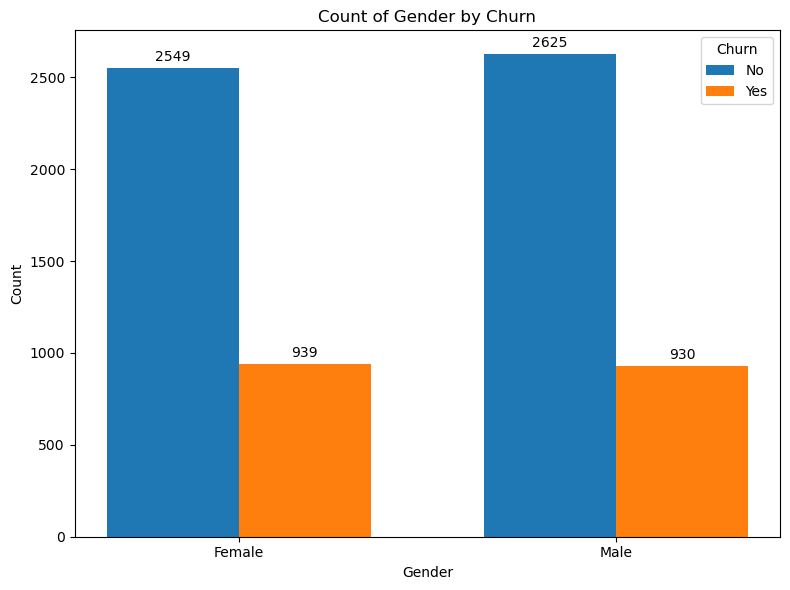

In [38]:
# Get the unique values for 'gender' and 'Churn'
genders = demo_gender['gender'].unique()
churn_values = demo_gender['Churn'].unique()

# Set the width of the bars
bar_width = 0.35

# Create the figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Calculate the positions for the bars
x = range(len(genders))

# Iterate through each 'Churn' category
for i, churn_val in enumerate(churn_values):
    # Filter the DataFrame for the current 'Churn' value
    subset = demo_gender[demo_gender['Churn'] == churn_val]

    # Get the counts for each gender in the current 'Churn' category
    counts = [subset[subset['gender'] == gender]['count'].values[0] if gender in subset['gender'].values else 0 for gender in genders]

    # Calculate the x-offsets for the grouped bars
    x_offsets = [pos + i * bar_width for pos in x]

    # Plot the bars
    rects = ax.bar(x_offsets, counts, bar_width, label=churn_val)

# Add labels, title, and legend
ax.set_xlabel('Gender')
ax.set_ylabel('Count')
ax.set_title('Count of Gender by Churn')
ax.set_xticks([pos + (len(churn_values) - 1) * bar_width / 2 for pos in x])
ax.set_xticklabels(genders)
ax.legend(title='Churn')

# Add value labels on top of the bars (optional)
def autolabel(rects):
    """Attach a text label above each bar in *rects*, indicating its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Apply autolabel for each set of bars
for i in range(len(churn_values)):
    subset = demo_gender[demo_gender['Churn'] == churn_values[i]]
    counts = [subset[subset['gender'] == gender]['count'].values[0] if gender in subset['gender'].values else 0 for gender in genders]
    rects = ax.patches[i*len(genders):(i+1)*len(genders)] # Get the correct set of rectangles
    autolabel(rects)

# Show the plot
plt.tight_layout()
plt.show()

#### Partner with Relationship to Churning

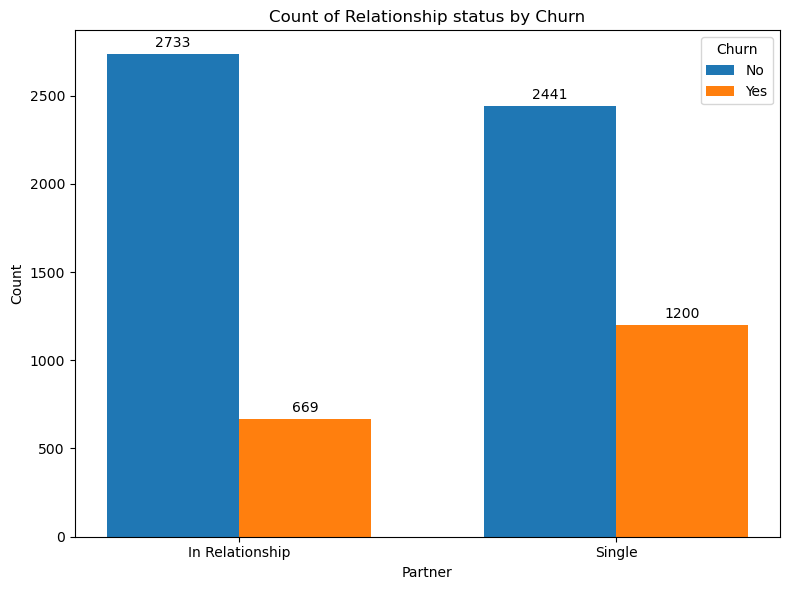

In [39]:
# Get the unique values for 'partner' and 'Churn'
partners = demo_partner['Partner'].unique()
churn_values = demo_partner['Churn'].unique()

# Set the width of the bars
bar_width = 0.35

# Create the figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Calculate the positions for the bars
x = range(len(partners))

# Iterate through each 'Churn' category
for i, churn_val in enumerate(churn_values):
    # Filter the DataFrame for the current 'Churn' value
    subset = demo_partner[demo_partner['Churn'] == churn_val]

    # Get the counts for each partner value in the current 'Churn' category
    counts = [subset[subset['Partner'] == Partner]['count'].values[0] if Partner in subset['Partner'].values else 0 for Partner in partners]

    # Calculate the x-offsets for the grouped bars
    x_offsets = [pos + i * bar_width for pos in x]

    # Plot the bars
    rects = ax.bar(x_offsets, counts, bar_width, label=churn_val)

# Add labels, title, and legend
ax.set_xlabel('Partner')
ax.set_ylabel('Count')
ax.set_title('Count of Relationship status by Churn')
ax.set_xticks([pos + (len(churn_values) - 1) * bar_width / 2 for pos in x])
ax.set_xticklabels(partners)
ax.legend(title='Churn')

# Add value labels on top of the bars (optional)
def autolabel(rects):
    """Attach a text label above each bar in *rects*, indicating its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Apply autolabel for each set of bars
for i in range(len(churn_values)):
    subset = demo_partner[demo_partner['Churn'] == churn_values[i]]
    counts = [subset[subset['Partner'] == Partner]['count'].values[0] if Partner in subset['Partner'].values else 0 for Partner in partners]
    rects = ax.patches[i*len(partners):(i+1)*len(partners)] # Get the correct set of rectangles
    autolabel(rects)

# Show the plot
plt.tight_layout()
plt.show()

#### Dependents with Relationship to Churning

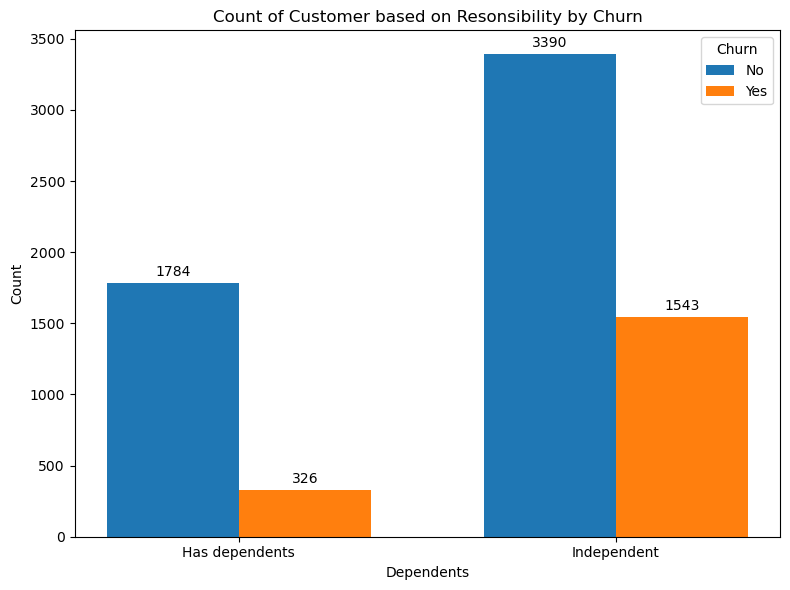

In [40]:
# Get the unique values for 'dependents' and 'Churn'
Dependents = demo_dependents['Dependents'].unique()
churn_values = demo_dependents['Churn'].unique()

# Set the width of the bars
bar_width = 0.35

# Create the figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Calculate the positions for the bars
x = range(len(Dependents))

# Iterate through each 'Churn' category
for i, churn_val in enumerate(churn_values):
    # Filter the DataFrame for the current 'Churn' value
    subset = demo_dependents[demo_dependents['Churn'] == churn_val]

    # Get the counts for each gender in the current 'Churn' category
    counts = [subset[subset['Dependents'] == Dependents]['count'].values[0] if Dependents in subset['Dependents'].values else 0 for Dependents in Dependents]

    # Calculate the x-offsets for the grouped bars
    x_offsets = [pos + i * bar_width for pos in x]

    # Plot the bars
    rects = ax.bar(x_offsets, counts, bar_width, label=churn_val)

# Add labels, title, and legend
ax.set_xlabel('Dependents')
ax.set_ylabel('Count')
ax.set_title('Count of Customer based on Resonsibility by Churn')
ax.set_xticks([pos + (len(churn_values) - 1) * bar_width / 2 for pos in x])
ax.set_xticklabels(Dependents)
ax.legend(title='Churn')

# Add value labels on top of the bars (optional)
def autolabel(rects):
    """Attach a text label above each bar in *rects*, indicating its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Apply autolabel for each set of bars
for i in range(len(churn_values)):
    subset = demo_dependents[demo_dependents['Churn'] == churn_values[i]]
    counts = [subset[subset['Dependents'] == Dependents]['count'].values[0] if Dependents in subset['Dependents'].values else 0 for Dependents in Dependents]
    rects = ax.patches[i*len(Dependents):(i+1)*len(Dependents)] # Get the correct set of rectangles
    autolabel(rects)

# Show the plot
plt.tight_layout()
plt.show()

#### Overall Unique demographic with Relationship to Churning

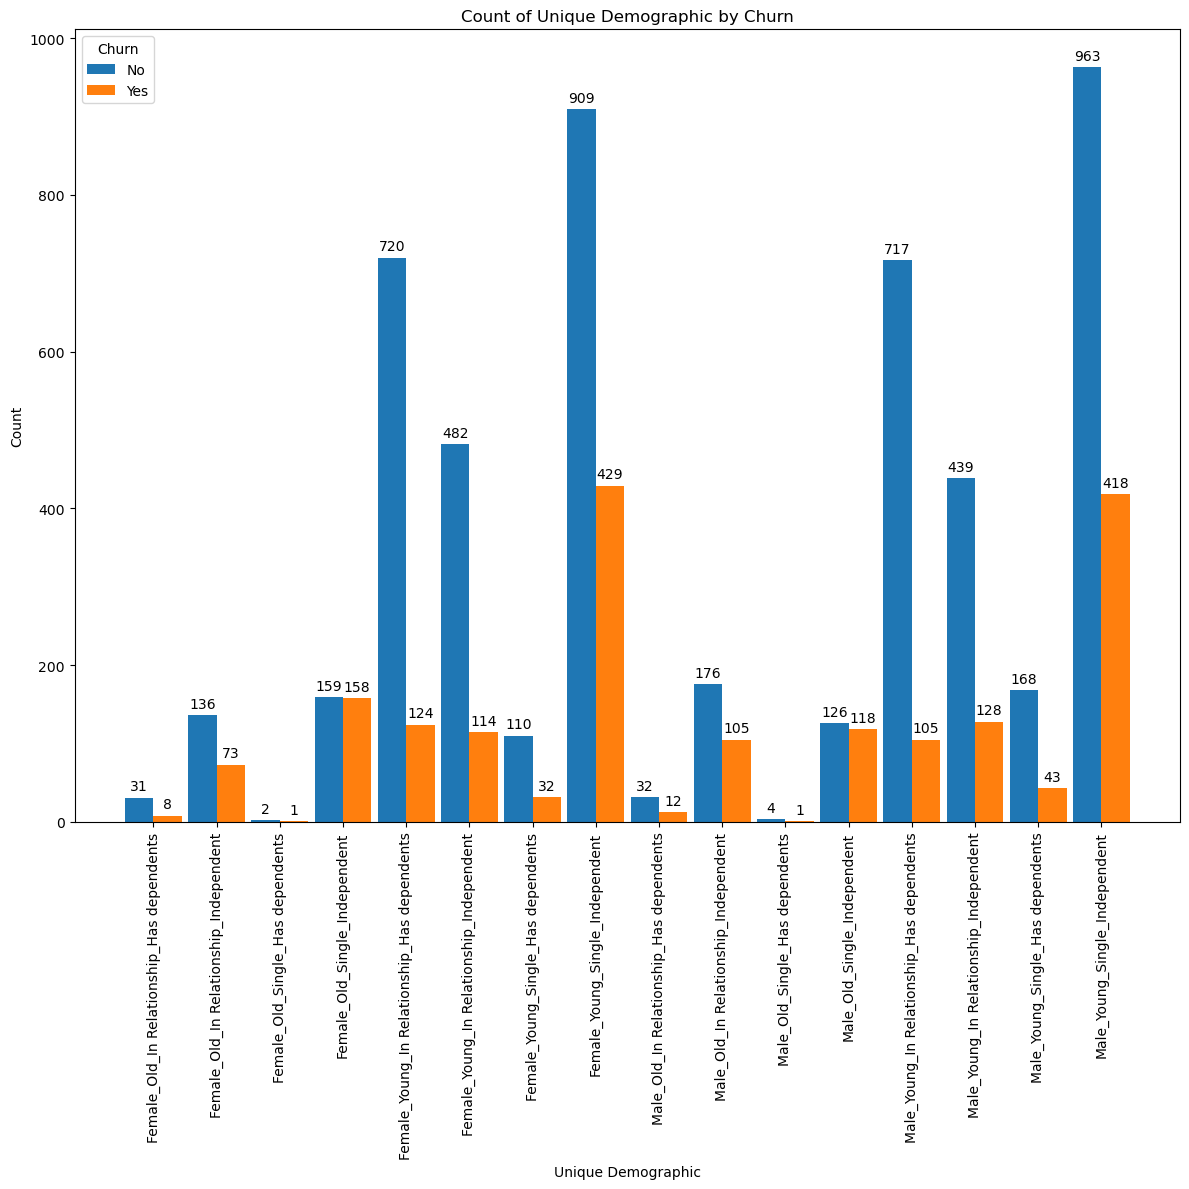

In [41]:
# Get the unique values for 'gender' and 'Churn'
combines = demo_unique['Combined'].unique()
churn_values = demo_unique['Churn'].unique()

# Set the width of the bars
bar_width = 0.45

# Create the figure and axes
fig, ax = plt.subplots(figsize=(12, 12))

# Calculate the positions for the bars
x = range(len(combines))

# Iterate through each 'Churn' category
for i, churn_val in enumerate(churn_values):
    # Filter the DataFrame for the current 'Churn' value
    subset = demo_unique[demo_unique['Churn'] == churn_val]

    # Get the counts for each gender in the current 'Churn' category
    counts = [subset[subset['Combined'] == Combined]['count'].values[0] if Combined in subset['Combined'].values else 0 for Combined in combines]

    # Calculate the x-offsets for the grouped bars
    x_offsets = [pos + i * bar_width for pos in x]

    # Plot the bars
    rects = ax.bar(x_offsets, counts, bar_width, label=churn_val)

# Add labels, title, and legend
ax.set_xlabel('Unique Demographic')
ax.set_ylabel('Count')
ax.set_title('Count of Unique Demographic by Churn')
ax.set_xticks([pos + (len(churn_values) - 1) * bar_width / 2 for pos in x])
ax.set_xticklabels(combines, rotation=90)
ax.legend(title='Churn')

# Add value labels on top of the bars (optional)
def autolabel(rects):
    """Attach a text label above each bar in *rects*, indicating its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Apply autolabel for each set of bars
for i in range(len(churn_values)):
    subset = demo_unique[demo_unique['Churn'] == churn_values[i]]
    counts = [subset[subset['Combined'] == Combined]['count'].values[0] if Combined in subset['Combined'].values else 0 for Combined in combines]
    rects = ax.patches[i*len(combines):(i+1)*len(combines)] # Get the correct set of rectangles
    autolabel(rects)

# Show the plot
plt.tight_layout()
plt.show()

## Finding

### Customer Demographics

The largest customer group consists of **young, single males without dependents**, followed closely by **young, single females without dependents**. Together, these two groups make up **38.6%** of the customer base.

Right below them, another significant group includes **young, partnered females with dependents**, closely followed by their **male counterparts**. Combined, these groups account for **23.65%** of customers.

At the other end of the spectrum, the **smallest customer segment** consists of **older individuals—both male and female—who are either single or partnered and have dependents**. These four groups combined make up just **1.28%** of the customer base.

### Churn Rate Insights

#### Highest Customer Attrition Rates
Customer attrition is highest among older individuals, with the following groups showing notable churn rates:
- **Older, single females with no dependents** (**50%**)
- **Older, single males with no dependents** (**48%**)
- **Older, partnered males with no dependents** (**37%**)
- **Older, partnered females with no dependents** (**35%**)
- **Older, single females with dependents** (**33%**)

Despite their high churn rates, these groups collectively contributed **24.34%** of total customer losses.

#### Young Single Customers
Meanwhile, **young, single customers**—both male and female—show churn rates of:
- **Young, single females with no dependents** (**32%**)  
- **Young, single males with no dependents** (**30%**)  

Together, they account for **22.95%** and **22.36%** of total customer losses.

#### Lower Churn Rates Among Young Customers with Dependents
On the other side of the spectrum, **younger customers with dependents** experience significantly lower churn rates:
- **Young, partnered males with dependents** (**13%**)
- **Young, partnered females with dependents** (**15%**)
- **Young, partnered females with no dependents** (**19%**)
- **Young, single males with dependents** (**20%**)

Although these groups churn at lower rates, **their combined losses account for 20.65% of total customer attrition**.

### Conclusion

#### Key Findings
1. **Older customers have the highest churn rates**, particularly those who are single and have no dependents. However, their **total contribution to customer loss is moderate (24.34%)**, likely due to their smaller customer base.
2. **Young, single customers exhibit lower individual churn rates (32% and 30%)**, but their combined customer losses (**22.95% + 22.36%**) are **comparable to older customers**, making them a significant factor in overall churn.
3. **Young, partnered customers with dependents have the lowest churn rates** (between **13% and 20%**), yet they still contribute **20.65% of total customer attrition** due to their larger presence in the customer base.

#### Implications & Recommendations
- **Targeted Retention Strategies for Older Customers**: Since older individuals churn at the highest rates, personalized engagement, loyalty rewards, and service enhancements tailored to their needs could improve retention.
- **Address Young Single Customers’ Churn**: Despite their lower churn rates, their large numbers make their impact on total customer losses significant. Understanding their pain points and improving their user experience may help reduce churn.
- **Leverage Stability of Partnered Customers**: Young, partnered customers with dependents appear to be more stable. **Upselling or cross-selling** services to this group could maximize long-term revenue while ensuring their continued engagement.
